In [1]:
include("../../src/Yggdrasil.jl")
using .Yggdrasil

# Example description

This notebook has examples on how to plot 2D data in multiple subplot figures.

base calls are for 3D matrices. Two first indices are assumed to contain 2D information, and the last index is either for different variables (or timeslot). 

Can also be called for 4D matrices, but here both a "variable index" and a "timeslot index" must be given. 

In [2]:
data_folder = "../example_data/test_01/"

#-------------- get meta information on initial snapshot --------------
snap = 101                                        # Number of the snapshot
initial_snap = read_snapshot(data_folder, snap)   # Load initial snapshot meta
IDX = initial_snap.IDX                            # Variables index information
system = initial_snap.SYSTEM;                     # Unit system
#-----------------------------------------------------------------------------

#--------------- define which snapshot to load ---------------
i_start = 101   # Start snapshot index
i_end  = 110    # End snapshot index
stride = 1      # Stride - how many snapshots to skip between loads
n_snaps = Int(floor( (i_end - i_start) / stride) + 1)  # total number of snapshots to load
load_pic = false; # If true, will only load PIC patch data

#------------ Get area defined by LLC and URC aligned with patches --------------   
    #------------ set refinement level -------------------
    ref_level = 3  # zero meants no refiment (coarsest grid level)
    #-----------------------------------------------------
    #----------- set level based on refinement level -----------
    level_min = initial_snap.LEVELMIN
    level = level_min + ref_level 
    #-----------------------------------------------------
    #------------- define midpoint of area and number of patches
    midpoint = [16.27207,  0.0, 6.1138]
    patches = 4
    #-----------------------------------------------------
llc, urc, llc_pos, urc_pos  = get_area(initial_snap, midpoint, patches, level);
#---------------------- load snapshots in the area ----------------------
#--------- first get cartesian coordinates for the area -----------
drop_dims = true  # drops array dimension with size 1 in the cartesian coordinates
    #--------- in example 2D case, y dimension is collapse, so we can ignore it like this 
x,_,z,ds = get_xyz(initial_snap, true, level; llc=llc, urc=urc);
#-------------------------------------------------------------------
    # optional get 1D coordinates for x and z
x_vals = x[:, 1]
z_vals = z[1, :];
#-------------------------------------------------------------------

#---------------- load snapshot data in the area ----------------------
data, times = load_multiple_snapshots(data_folder, 
                                      i_start, i_end, stride, 
                                      llc, urc,
                                      load_pic; 
                                      use_level=level);

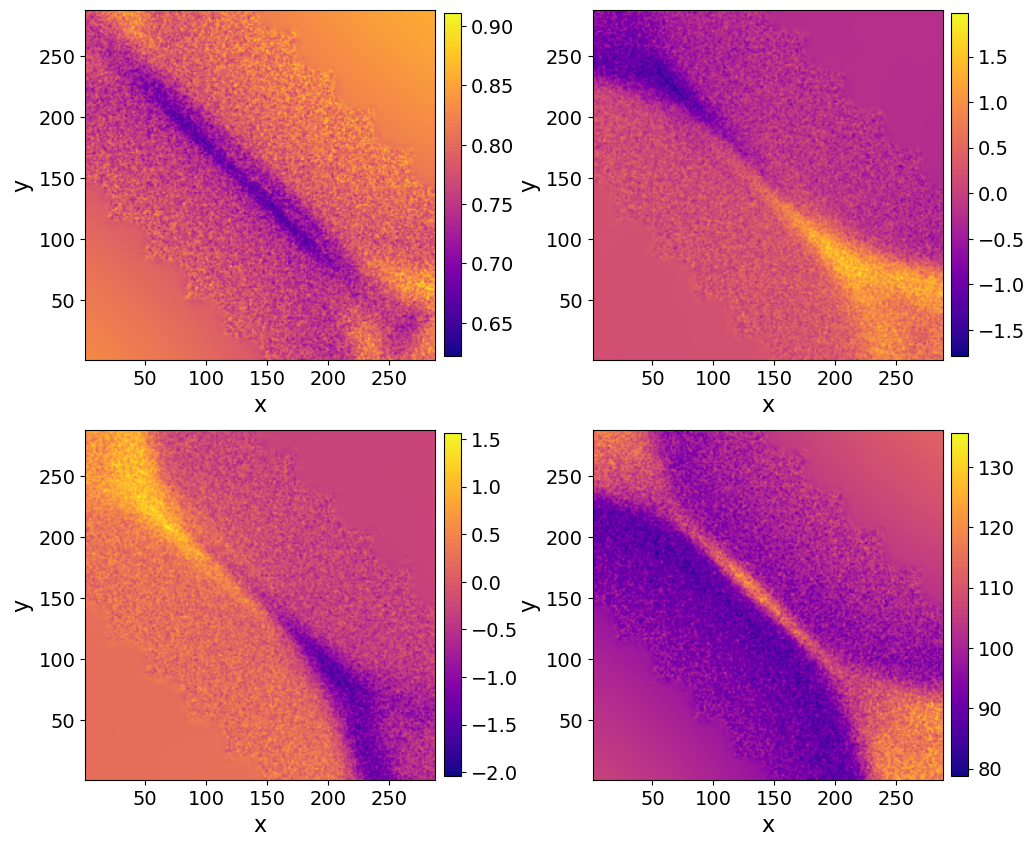

In [3]:
#----------- simplest way to plot subplot with heatmaps -----------
# data must be 3D array with dimensions (x, z, variables)
# must specify number of rows and columns for the heatmap grid
# must specify the variable indeces to plot in the heatmaps

#--------------- reformat data as 3D array ---------------
timeslot = 1
data_drop = drop_unit_dims(data)
data_time = data_drop[:,:,:,timeslot]
#------------------------------------------------------------
#------------ specify number of rows and columns for the heatmap grid ------------
nrows = 2
ncols = 2
#----------------------------------------------------------------------------------
#----------------- specify indices to plot in the heatmaps -----------------
#------ indices go by column first, then row 
#      this correspond to   [  1,    2
#                             3,    4,]
indices = [1,2,4,5];
#---------------------------------------------------------------------------
#----------------- plot heatmaps -----------------
plot_heatmaps(data_time, nrows, ncols, indices)

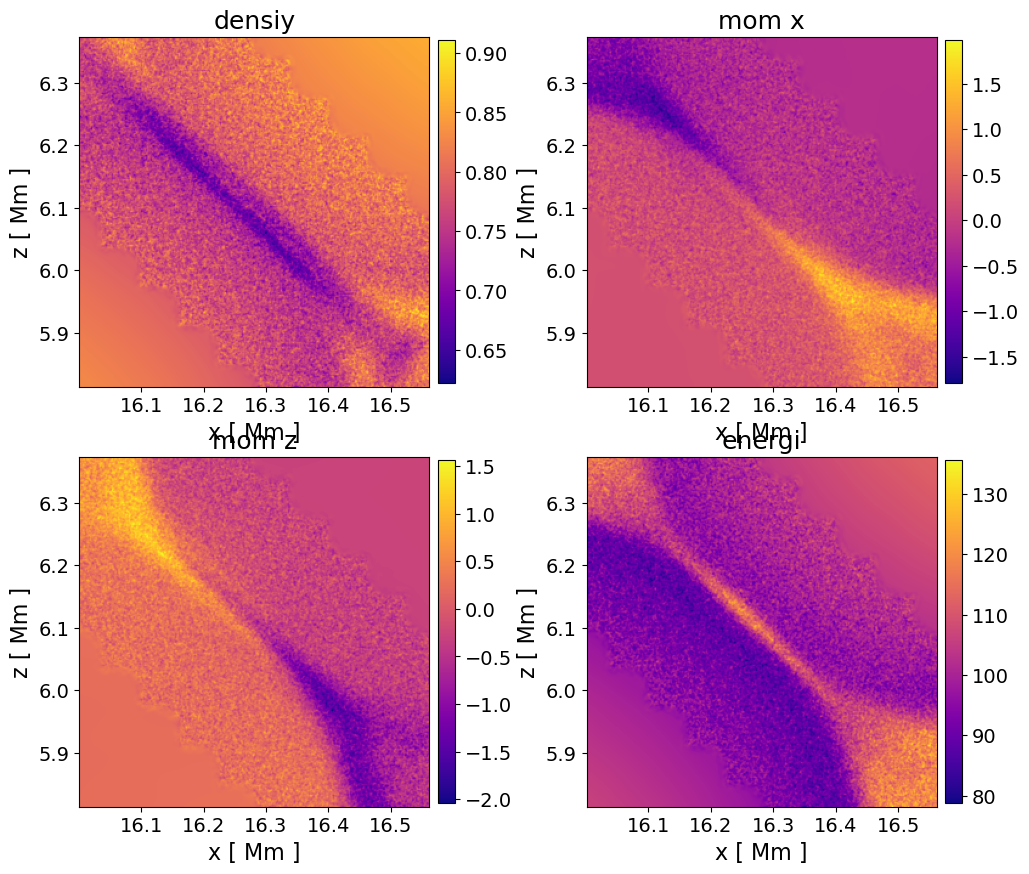

In [4]:
#-------------- further kwargs for the heatmaps --------------
# kwargs can be specified either for ALL subplots of for individual subplots
# for individual use the '_all' suffix. Here the input must be an array of the same length as the number of subplots
# Example used here:
#        x is specified, so it is used for all subplots
#        y is specified, so it is used for all subplots
#        title_all is specified - this is individual titles for each subplot
#        xlabel and ylabel are specified - these are used for all subplots
titles = ["densiy", "mom x", "mom z", "energi"]
plot_heatmaps(data_time, nrows, ncols, indices;
        x = x_vals, y = z_vals,
        title_all = titles,
        xlabel = "x [ Mm ]",
        ylabel = "z [ Mm ]" )

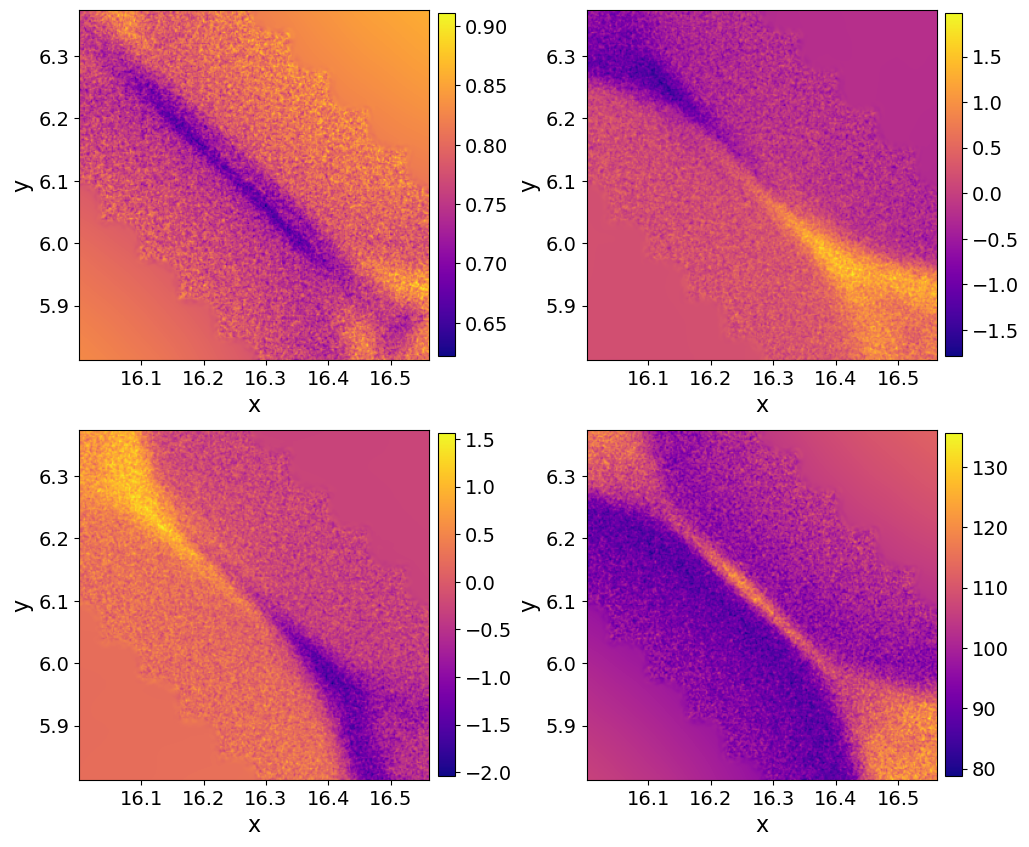

In [5]:
#-------------- further kwargs for the heatmaps --------------
# another exaple of using x_all instead of x
titles = ["densiy", "mom x", "mom z", "energi"]
x_values = [x_vals, x_vals, x_vals, x_vals]
plot_heatmaps(data_time, nrows, ncols, indices;
        x_all = x_values, y = z_vals)

In [6]:
#-------------- Example of improper function call --------------
# Here both 'x' and 'x_all' are specified, which is not allowed
titles = ["densiy", "mom x", "mom z", "energi"]
x_values = [x_vals, x_vals, x_vals, x_vals]
plot_heatmaps(data_time, nrows, ncols, indices;
        x_all = x_values, y = z_vals,
        x = x_vals)

ErrorException: Cannot specify both `x` and `x_all` in kwargs.

## Plotting for 4D matrices

In [7]:
#----------- p
data_drop = drop_unit_dims(data);

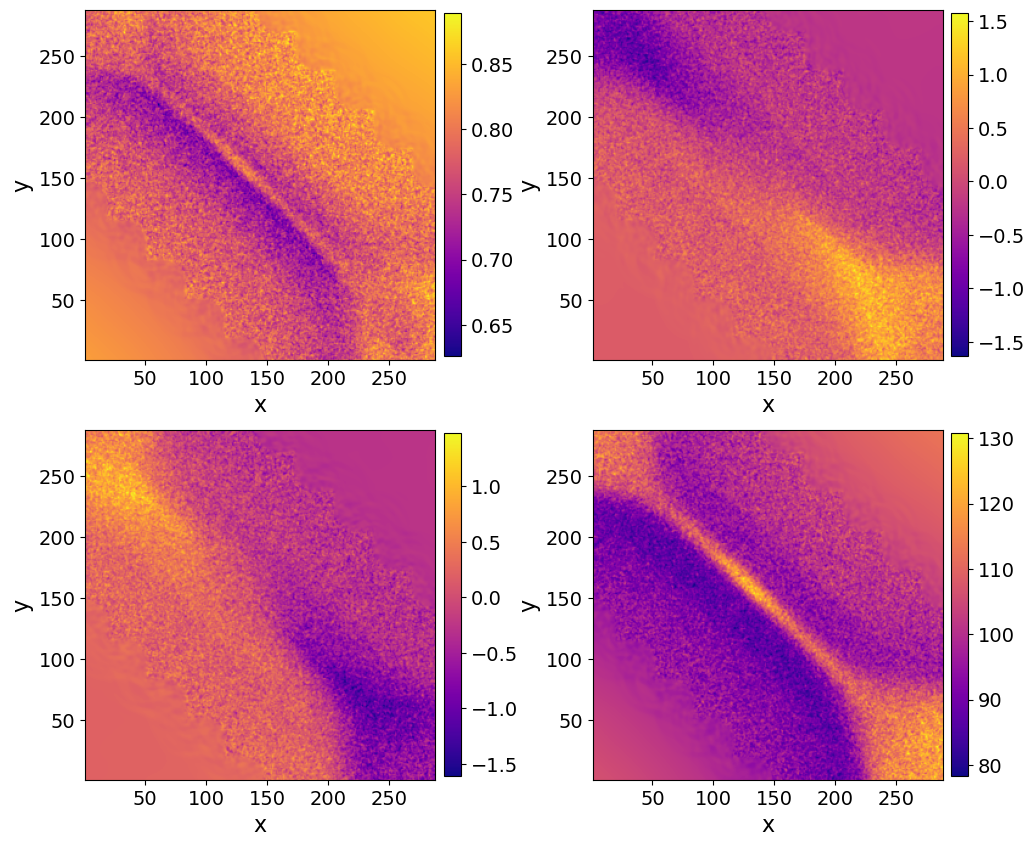

In [8]:
#-------------- plot different variables at the same time --------------
indices = [1,2,4,5]
timeslot = 5
plot_heatmaps(data_drop, nrows, ncols, indices, timeslot)

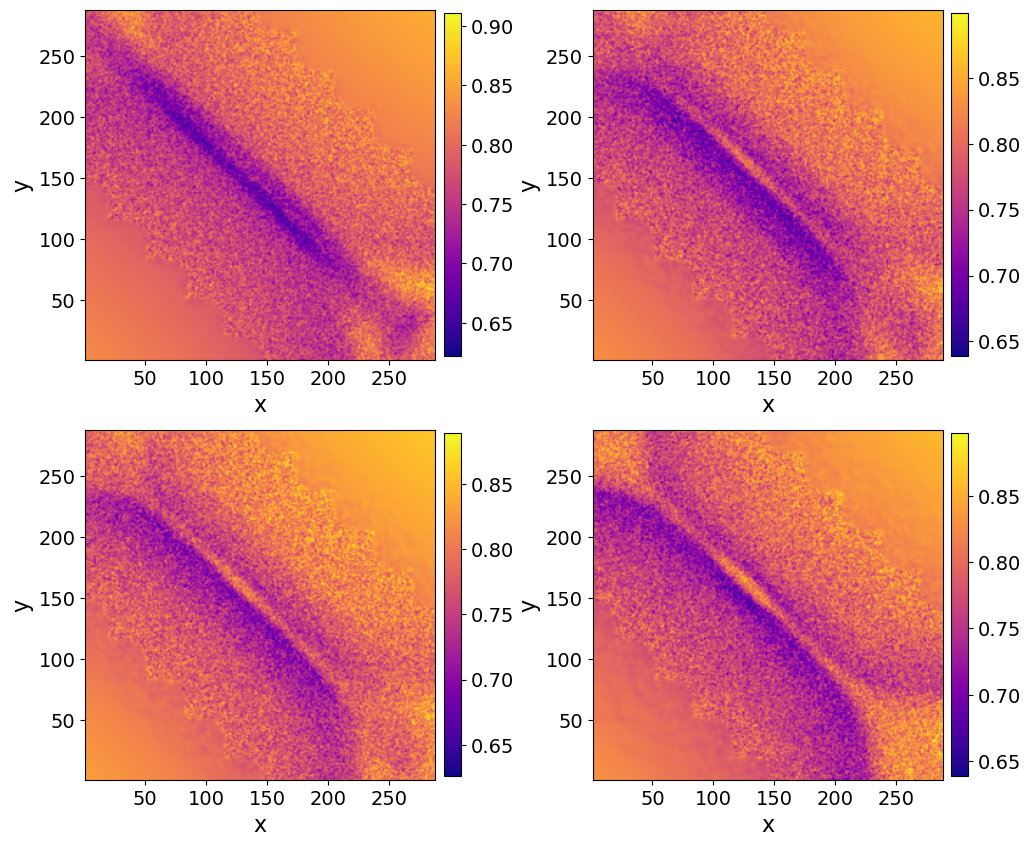

In [9]:
#-------------- plot the same variable at different times --------------
nrows = 2
ncols = 2
indices = 1
timeslot = [1,4,5,10]
plot_heatmaps(data_drop, nrows, ncols, indices, timeslot)

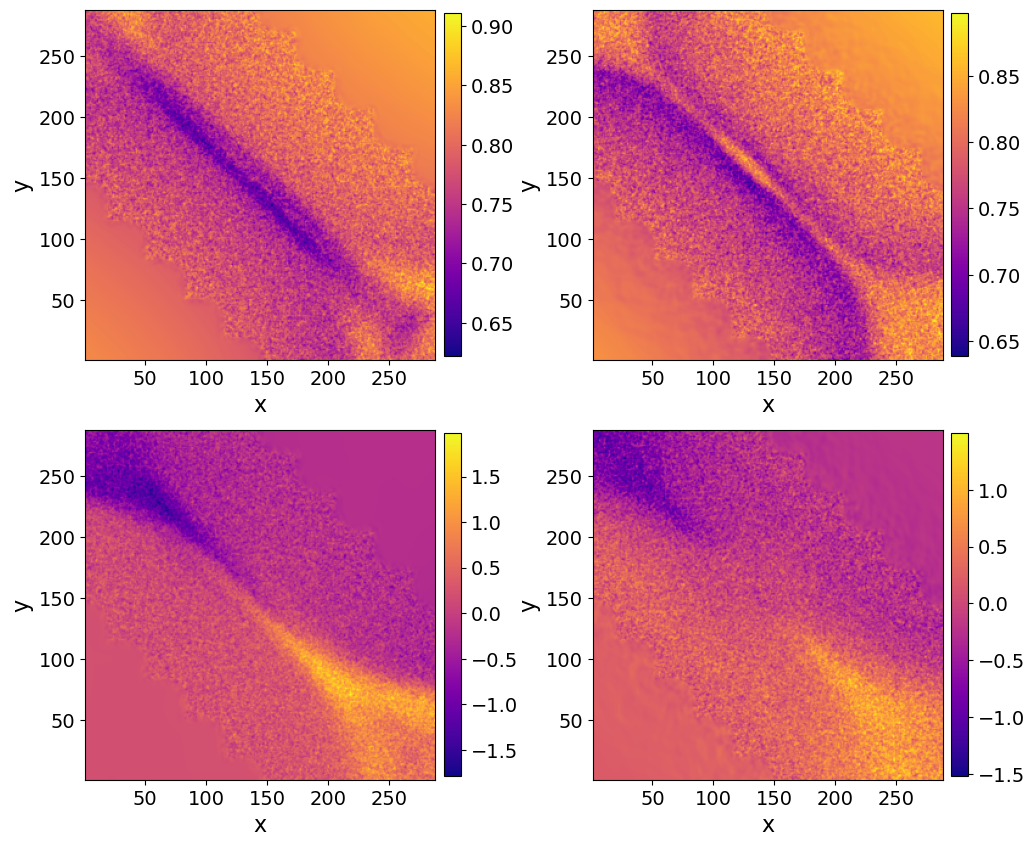

In [10]:
#-------------- plot different variables at at different times --------------
nrows = 2
ncols = 2
indices = [1,1,2,2]
timeslot = [1,10,1,10]
plot_heatmaps(data_drop, nrows, ncols, indices, timeslot)